In [174]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import sys
#tes connection
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import sqlalchemy
import matplotlib.pyplot as plt
from analysis_functions import *
from os.path import join
import seaborn as sns; sns.set()


%load_ext autoreload
%autoreload 2
#adding local libraries
sys.path.append('/gfs/computations/phage/bin')
sys.path.append('/gfs/computations/phage/bin/others')
sys.path.append('/gfs/computations/phage/efop362_esztergom')
#database connections

from DBCreator import BackgroundDatabase
from MicrobiomeDataManagement import MicrobiomeData
from Taxonomy import Taxonomy

pandas.options.display.float_format = '{:.4f}'.format
working_dir = "/gfs/computations/phage"
#working_dir = "~"
#192 oszlop és 3666 sor
columns = ['dataset', 'gender', 'geographic_location', 'organisation', 'health_status', 'sequenator', 'study']
additional_cols = ['sample_id', 'dataset_topic', 'body_site', 'sample_accession', 'run_accession', 'run_alias', 'base_count', 'read_count']
data_labels = ['dataset', 'gender', 'geographic_location', 'organisation', 'health_status', 'sequenator', 'study']
colors = ['navy', 'darkorange', 'peru', 'gold', 'maroon', 'deepskyblue', 'dimgray', 'olivedrab']


useful_cols = columns + additional_cols


hmpdesc_data = join(working_dir, "results/temporary_results/microbiome_data/all_dataset.tsv") #contains sex, source, other type of descriptional data
hmpdesc_data_filtered = join(working_dir, "results/temporary_results/microbiome_data/all_dataset_filtered.tsv") #contains sex, source, other type of descriptional data
lca_taxa_count_samples = join(working_dir, "results/temporary_results/lca_aggregated_results_taxon_id.tsv_alignment_tsh.0.9_max_hit_per_read500")

work_directory = join(working_dir, "results")
taxonomy_subset_name = "phage"
taxonomy_dump_dir = join(working_dir, "results/temporary_results")

t = Taxonomy(taxonomy_dump_dir, taxonomy_subset_name)
bgdb = BackgroundDatabase("RPH", savedir=taxonomy_dump_dir, isCreatingDB=False)
hmp = MicrobiomeData('all',hmpdesc_data)

#reading the input descriptors
hmp_descriptional_data = pd.read_csv(hmpdesc_data, sep='\t')
hmp_descriptional_datas = hmp_descriptional_data[useful_cols]
hmp_descriptional_datas.to_csv(hmpdesc_data_filtered, sep='\t', index=False)

save_prefix = 'LCA'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Creating a taxonomy
Loading NCBI tax_id2tax_name map!
Loading clades!
Adding strains!
Finding strain nodes!
Number of strains in the current dbs 186
Loading background database!
Creating a Microbiome data object for all


## Preparing microbiome data and calculating LCA values

In [175]:
# note that there are two taxon id for the envirement samples: 156614, 1074043 -> renaming he cols the values belong to 1074043, r

hmp_data = hmp.data
tax_data = t.get_pandas_dataframe()
tax_data["rank"]=tax_data["rank"].apply(lambda x: "species" if x == "strain" else x)
tax_data['taxon_name'] = tax_data[ ["taxon_id", 'taxon_name']].apply(lambda x: "environmental_samples2" if x['taxon_id'] == 1074043 else x['taxon_name'], axis=1)

seq_data = bgdb.get_pandas_dataframe_from_description_file()
species = pandas.read_csv(lca_taxa_count_samples, sep="\t", header=0, index_col=0)

cumulative_taxa_data = {sample_id: t.generate_cumulative_report(taxa2count, True) for sample_id, taxa2count in species.to_dict().items()}
species_cum = pandas.DataFrame.from_dict(cumulative_taxa_data,orient='Columns')
#taxon_id -> taxon_name, rank
tax_data_pure = tax_data[['taxon_name', 'rank']]
#cross check
tax_data[tax_data.taxon_id.isin([1074043, 156614])]



,taxon_name,taxon_id,rank,direct_hits,cumulative_hit
156614,environmental samples,156614,no rank,0,0
1074043,environmental_samples2,1074043,no rank,0,0


In [189]:
# reshaping the input data filtering to relevant attributes
hmpdesc_data_filtered2 = join(working_dir, "results/temporary_results/microbiome_data/all_dataset_filtered_used.tsv") 
analized_samples = list(species_cum.columns)
len(hmp_data)
true_analized_data = hmp_data[hmp_data.sample_id.isin(analized_samples)][columns + additional_cols]
true_analized_data.to_csv(hmpdesc_data_filtered2, sep= '\t', index=False)

3666

['bacteroides phage b124-14',
 'bacteroides phage b40-8',
 'enterobacteria phage bp-4795',
 'enterobacteria phage cdti',
 'enterobacteria phage fiaa91-ss',
 'enterobacteria phage ime10',
 'enterobacteria phage mep460',
 'enterobacteria phage p4',
 'enterobacteria phage p88',
 'enterobacteria phage phip27',
 'enterobacteria phage phix174 sensu lato',
 'enterobacteria phage sf101',
 'enterobacteria phage sfv',
 'enterobacteria phage yyz-2008',
 'escherichia phage phiv10',
 'escherichia phage tl-2011b',
 'escherichia virus p1',
 'escherichia virus p2',
 'klebsiella phage jd001',
 'klebsiella phage pkp126',
 'lactococcus phage bil311',
 'lactococcus phage c2',
 'parabacteroides phage yz-2015a',
 'parabacteroides phage yz-2015b',
 'salmonella phage re-2010',
 'salmonella phage sj46',
 'salmonella phage ssu5',
 'shigella phage sfiv',
 'staphylococcus phage spbeta-like',
 'streptococcus phage 20617',
 'streptococcus phage ymc-2011',
 'stx2-converting phage 1717',
 'stx2-converting phage 86',


In [218]:
sample_taxon2hitcounts_normalized_count.to_csv(join(working_dir, "results/temporary_results/phage_counts_filtered.tsv"), sep='\t', index=False)
list(tt.index)

,taxon_id,sample_id,hitcount,taxon_name,rank,min_count,all_hitcount,normalized_count
0,1,ERR844057,2500,root,no rank,25,7459,0.3352
1,10239,ERR844057,2500,viruses,superkingdom,25,2500,1.0000
2,10841,ERR844057,2414,microviridae,family,25,2483,0.9722
3,10860,ERR844057,31,inoviridae,family,25,2483,0.0125
4,10861,ERR844057,31,inovirus,genus,25,2450,0.0127
5,28883,ERR844057,39,caudovirales,order,25,39,1.0000
6,29258,ERR844057,2445,ssdna viruses,no rank,25,7459,0.3278
7,35237,ERR844057,39,"dsdna viruses, no rna stage",no rank,25,7459,0.0052
8,374840,ERR844057,2412,enterobacteria phage phix174 sensu lato,species,25,2457,0.9817
9,1910950,ERR844057,2412,bullavirinae,subfamily,25,2412,1.0000


Filtering the taxa using pct treshold
AAAHeldsdsadlo4dffd
number of taxa:  24


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

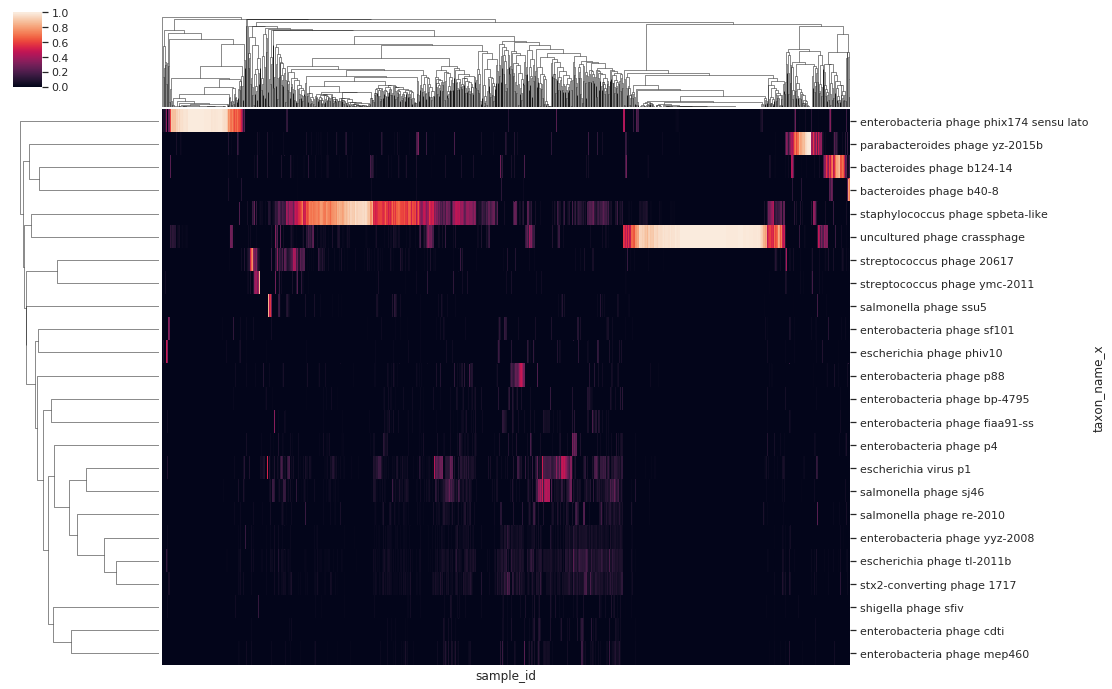

In [190]:
min_pct_hit_count = 0.01
Npresent=20
avg_abd =0
rank='species'
dominant_abd=0.04
dominant_Nabd=20
dominant_phages_only=True
fig_size_x = 15
fig_size_y_per_entitity = 0.5

[taxon2hitcount, taxon2hitcount_min_count] = get_filtered_taxon_sample_table(species_cum,tax_data_pure, min_pct_hit_count)
[sample_taxon2hitcounts_normalized_count, taxon2_avg_count]= normalize_taxahits_taxonomy_level(taxon2hitcount, taxon2hitcount_min_count)

tt = get_taxon_sample_dataframe(sample_taxon2hitcounts_normalized_count,taxon2_avg_count, 
                                Npresent, avg_abd, rank, dominant_abd, dominant_Nabd, dominant_phages_only)
g = sns.clustermap(tt, metric = 'braycurtis', figsize=[fig_size_x, len(tt.index)*fig_size_y_per_entitity], xticklabels=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
#plt.setp(g.ax_heatmap.set_xlabel(''))
plt.show()

In [128]:
#debig
sample_taxon2hitcounts_normalized_count.head()
taxon2_avg_count.head()
sample_taxon2hitcounts_normalized_count.pivot(index = 'taxon_name', columns = 'sample_id', values = 'normalized_count')

#tt = get_taxon_sample_dataframe(sample_taxon2hitcounts_normalized_count,taxon2_avg_count, MinN, MinAvgAbd, Rank, DNabd, DNabd, IsDominant)

sample_taxon2hitcounts_normalized_count[sample_taxon2hitcounts_normalized_count.duplicated(subset=['taxon_name', 'sample_id'], keep=False)].head()
sample_taxon2hitcounts_normalized_count[sample_taxon2hitcounts_normalized_count.taxon_id.isin([156614, 1074043])].groupby(by=['taxon_id']).sum()
# problem with 156614 and 1074043


,taxon_id,sample_id,hitcount,taxon_name,rank,min_count,all_hitcount,normalized_count
0,1,ERR844057,2500,root,no rank,25,7459,0.3352
1,10239,ERR844057,2500,viruses,superkingdom,25,2500,1.0000
2,10841,ERR844057,2414,microviridae,family,25,2483,0.9722
3,10860,ERR844057,31,inoviridae,family,25,2483,0.0125
4,10861,ERR844057,31,inovirus,genus,25,2450,0.0127


,taxon_id,taxon_name,rank,mean,count
0,1,root,no rank,0.3794,1150
1,10239,viruses,superkingdom,1.0000,1150
2,10662,myoviridae,family,0.3065,802
3,10663,t4virus,genus,0.0891,55
4,10665,enterobacteria phage t4,species,0.0003,31


sample_id,ERR526291,ERR527006,ERR527007,ERR527008,ERR527009,ERR527010,ERR527011,ERR527012,ERR527013,ERR527014,...,mgm4716262,mgm4716263,mgm4716264,mgm4716265,mgm4716266,mgm4716267,mgm4716268,mgm4716269,mgm4716270,mgm4716272
taxon_name,,,,,,,,,,,,,,,,,,,,,
achromobacter phage phiaxp-3,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter bacteriophage ap22,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter phage acj61,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter phage acj9,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter phage bphi-b1251,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter phage lz35,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter phage phiac-1,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter phage vb_abas_trs1,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acinetobacter phage ymc13/03/r2096,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,taxon_id,sample_id,hitcount,taxon_name,rank,min_count,all_hitcount,normalized_count


,hitcount,min_count,all_hitcount,normalized_count
taxon_id,,,,
156614,139586496,1419923,425023533,84.1410
1074043,12280,772,223544,1.1756


In [129]:
## ?PCA?
MinHit = 0 #0.00000001
MinN=1
MinAvgAbd =0
Rank='species'
DAbd = 0.04
DNabd = 20
IsDominant = False
fig_size_x = 15
fig_size_y_per_entitity = 0.3
colors = ['navy', 'darkorange', 'peru', 'gold', 'maroon']

save_name_ext = generate_string_from_params(MinHit=MinHit, MinN=MinN, MinAvgAbd=MinAvgAbd, Rank=Rank, DAbd=DAbd, DNabd=DNabd, IsDominant=IsDominant)
pca_save_name = join(taxonomy_dump_dir, save_prefix + ".PCA" + save_name_ext  +  ".xls")

[taxon2hitcount, taxon2hitcount_min_count] = get_filtered_taxon_sample_table(species_cum,tax_data_pure, MinHit)
[sample_taxon2hitcounts_normalized_count, taxon2_avg_count]= normalize_taxahits_taxonomy_level(taxon2hitcount, taxon2hitcount_min_count)
tt = get_taxon_sample_dataframe(sample_taxon2hitcounts_normalized_count,taxon2_avg_count, MinN, MinAvgAbd, Rank, DNabd, DNabd, IsDominant)
tt=tt.transpose()
Y=tt.merge(hmp.data, left_index=True, right_index=True)[data_labels]

pca=plot_pca(tt, Y, 'dataset', colors, 6)
plt.show()
print(pca.explained_variance_ratio_)
#pca.components_
#pca_3d_plotly(tt, Y, 'dataset', colors, 3)
pca_components = pandas.DataFrame(pca.components_,columns = tt.columns).transpose()
pca_components.sort_values(by=[0]).to_excel(pca_save_name)


{'MinHit': 0, 'MinN': 1, 'MinAvgAbd': 0, 'Rank': 'species', 'DAbd': 0.04, 'DNabd': 20, 'IsDominant': False}
Filtering the taxa using pct treshold
AAAHeldsdsadlo4dffd
number of taxa:  876
to many coordinates, discard plotting! 


<Figure size 432x288 with 0 Axes>

[0.40977222 0.24429315 0.12178854 0.05192877 0.03292334 0.01595987]


In [206]:
#tax_data["rank"]=tax_data["rank"].apply(lambda x: "species" if x == "strain" else x)
#tax_data["rank"]=tax_data["rank"].apply(lambda x: "species" if x == "strain" else x)


,dataset,gender,geographic_location,health_status,sequenator
sample_id,,,,,
ERR526291,Qin2,female,China,Healthy,Illumina HiSeq 2000
ERR527006,Qin2,male,China,Healthy,Illumina HiSeq 2000
ERR527007,Qin2,female,China,Healthy,Illumina HiSeq 2000
ERR527008,Qin2,male,China,Healthy,Illumina HiSeq 2000
ERR527009,Qin2,male,China,Healthy,Illumina HiSeq 2000
ERR527010,Qin2,male,China,Healthy,Illumina HiSeq 2000
ERR527011,Qin2,male,China,Healthy,Illumina HiSeq 2000
ERR527012,Qin2,male,China,Healthy,Illumina HiSeq 2000
ERR527013,Qin2,male,China,Healthy,Illumina HiSeq 2000


{'MinHit': 0, 'MinN': 1, 'MinAvgAbd': 0, 'Rank': 'species', 'DAbd': 0.04, 'DNabd': 20, 'IsDominant': False}
Filtering the taxa using pct treshold
AAAHeldsdsadlo4dffd
number of taxa:  35


['dataset', 'gender', 'geographic_location', 'health_status', 'sequenator']

target_names, ['China', 'United Kingdom', nan, 'USA']
{'China': 'navy', 'United Kingdom': 'darkorange', nan: 'peru', 'USA': 'gold'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'norma

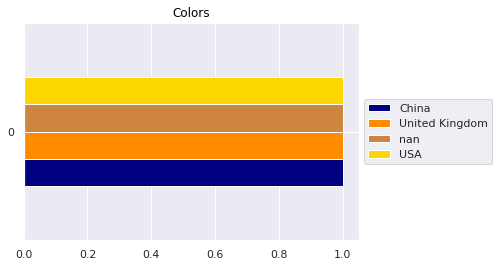

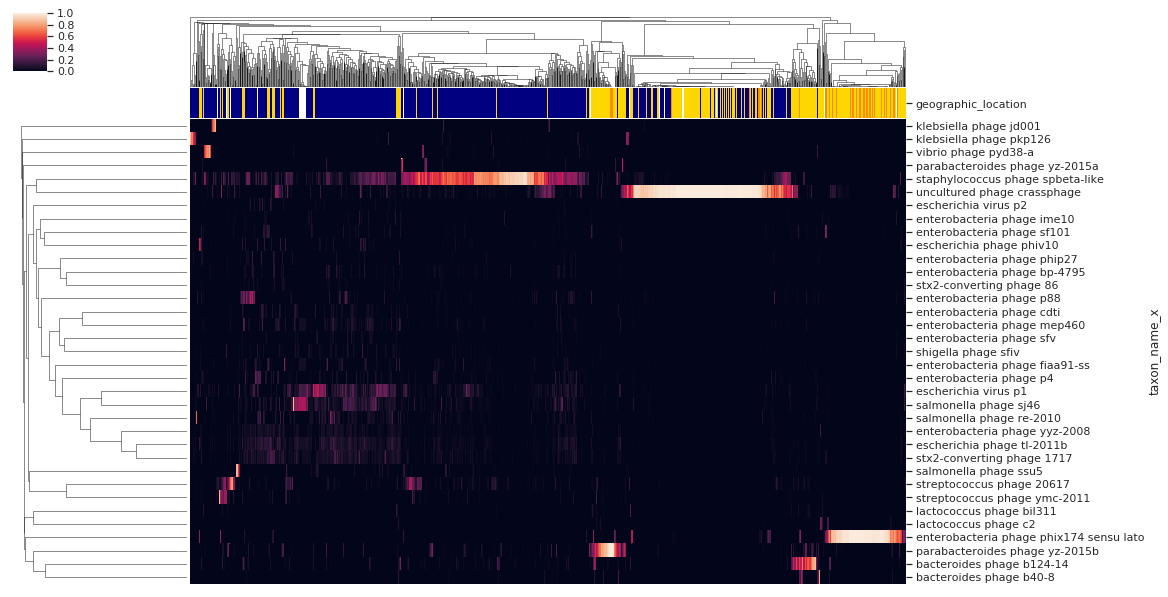

({'China': 'navy', 'United Kingdom': 'darkorange', nan: 'peru', 'USA': 'gold'},
 <seaborn.matrix.ClusterGrid at 0x7f0cb59a35f8>)

<Figure size 432x288 with 0 Axes>

In [207]:
# ploting the variable dependence

from matplotlib.backends.backend_pdf import PdfPages


min_pct_hit_count = 0.01
Npresent=20
avg_abd =0
rank='species'
dominant_abd=0.04
dominant_Nabd=10
dominant_phages_only=True
fig_size_x = 15
fig_size_y_per_entitity = 0.3
save_name_ext = generate_string_from_params(MinHit=MinHit, MinN=MinN, MinAvgAbd=MinAvgAbd, Rank=Rank, DAbd=DAbd, DNabd=DNabd, IsDominant=IsDominant)
pdffile_test = join(taxonomy_dump_dir, save_prefix + "" + save_name_ext  + ".pdf")
pp = PdfPages(pdffile_test)



[taxon2hitcount, taxon2hitcount_min_count] = get_filtered_taxon_sample_table(species_cum,tax_data_pure, min_pct_hit_count)
[sample_taxon2hitcounts_normalized_count, taxon2_avg_count]= normalize_taxahits_taxonomy_level(taxon2hitcount, taxon2hitcount_min_count)

tt = get_taxon_sample_dataframe(sample_taxon2hitcounts_normalized_count,taxon2_avg_count, 
                                Npresent, avg_abd, rank, dominant_abd, dominant_Nabd, dominant_phages_only)
Y=tt.transpose().merge(hmp.data, left_index=True, right_index=True)[data_labels]
Y["geographic_location"] = Y["geographic_location"].apply(lambda x: "USA" if x in ["Chicago", "Boston", "Los Angeles" ] else x)

tt_transposed = tt.transpose()

data_labels = ['dataset', 'gender', 'geographic_location', 'health_status', 'sequenator']
data_labels
for data_label in ['geographic_location']:
    plot_cluster_map_with_classlabel(data_label,tt, Y, colors, pdffile=pp, fig_size_y_per_entitity=0.3)


pp.close()

['navy',
 'darkorange',
 'peru',
 'gold',
 'maroon',
 'deepskyblue',
 'dimgray',
 'olivedrab']

# Prelimainary studies for the dataset (what is in and what is not)

In [44]:


print(hmp_descriptional_data.columns)
len(hmp_descriptional_data) 
nonnulls = len(hmp_descriptional_data)-hmp_descriptional_data.isna().sum()
freqs_cols = pd.DataFrame(nonnulls.sort_values(ascending=False)).reset_index()
#hmp_descriptional_data.head()
list(freqs_cols[ 'index'])



Index(['16s seq (Y/N)', '454 seq (Y/N)', 'Adiponectin (mg/L)', 'Age',
       'Alb (g/L)', 'Alcohol related (Y or N)', 'Antivirus', 'Ascites', 'BMI',
       'C-peptide (nmol/L)',
       ...
       'submitted_bytes', 'submitted_format', 'submitted_ftp',
       'submitted_galaxy', 'submitted_md5', 'subset', 'tax_id',
       'year_diagnosed', 'ƴ-GT (µkat/L)', 'β-blocker'],
      dtype='object', length=192)


['dataset_topic',
 'sample_id',
 'dataset',
 'dataset_first_author',
 'raw_sequence_data_filename',
 'body_site',
 'organisation',
 'article_doi',
 'article',
 'instrument_model',
 'geographic_location',
 'first_public',
 'sample_alias',
 'fastq_md5',
 'sample_accession',
 'run_alias',
 'run_accession',
 'read_count',
 'instrument_platform',
 'last_updated',
 'library_layout',
 'secondary_sample_accession',
 'library_name',
 'library_selection',
 'library_source',
 'library_strategy',
 'scientific_name',
 'fastq_ftp',
 'secondary_study_accession',
 'fastq_galaxy',
 'tax_id',
 'base_count',
 'submission_accession',
 'study_title',
 'experiment_accession',
 'study_alias',
 'study_accession',
 'experiment_alias',
 'experiment_title',
 'fastq_aspera',
 'sra_md5',
 'sra_galaxy',
 'sra_ftp',
 'sra_bytes',
 'sra_aspera',
 'fastq_bytes',
 'center_name',
 'nominal_length',
 'sample_title',
 'health_status',
 'ena_spot_count',
 'ena_base_count',
 'submitted_md5',
 'submitted_galaxy',
 'submitted